In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test = pd.read_csv('/Users/kimginam/Kaggle/DATA/box_office_test.csv')
train = pd.read_csv('/Users/kimginam/Kaggle/DATA/box_office_train.csv')

In [3]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [4]:
train = train.drop(['homepage'], axis=1)
test = test.drop(['homepage'], axis=1)

Text(0.5, 1.0, 'Total Missing Value of Train (%)')

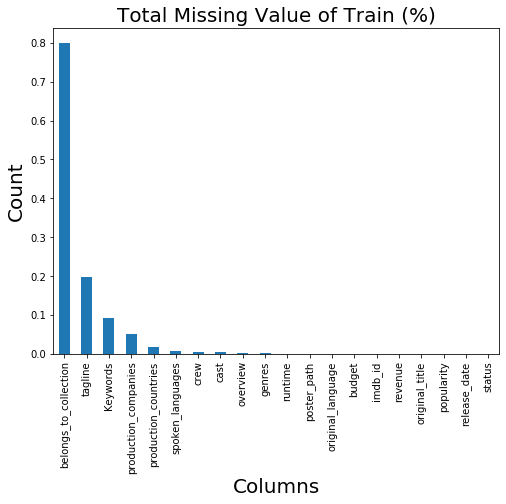

In [5]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Value of Train (%)", fontsize = 20)

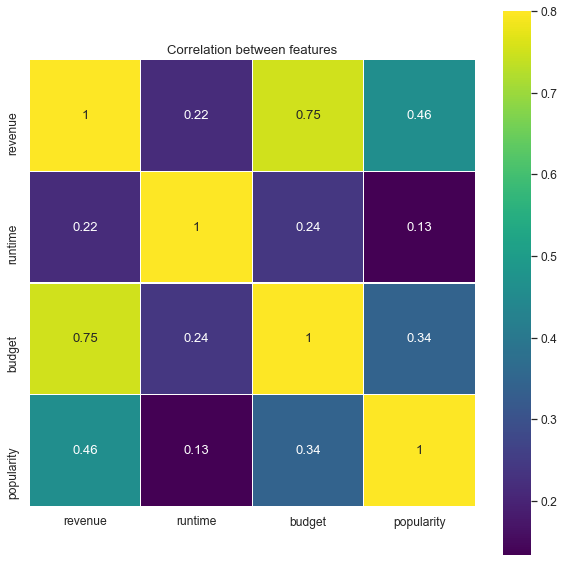

In [6]:
corrMatrix=train[['revenue', 'cast', 'runtime', 'production_countries', 'budget', 'popularity', 'release_date', 'title', 'genres', 'original_language']].corr()
sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))
sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

In [7]:
corr_matrix = train.corr()
corr_matrix["revenue"].sort_values(ascending=False)

revenue       1.000000
budget        0.752965
popularity    0.461460
runtime       0.216380
id            0.000610
Name: revenue, dtype: float64

In [8]:
train.loc[1819,'genres']='Ramance, Drama'
train.loc[470,'genres']='Adventure, Drama'
train.loc[1622,'genres']='Drama, Comedy'
train.loc[1814,'genres']='Comedy'
train.loc[2423,'genres']='Action'
train.loc[2686,'genres']='Thriller'
train.loc[2900,'genres']='Drama'

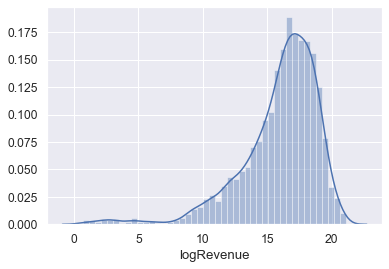

In [9]:
train['logRevenue'] = np.log1p(train['revenue'])
sns.distplot(train['logRevenue'])

In [10]:
train[['release_month','release_day','release_year']]=train['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int)

train.loc[ (train['release_year'] <= 19) & (train['release_year'] < 100), "release_year"] += 2000
train.loc[ (train['release_year'] > 19)  & (train['release_year'] < 100), "release_year"] += 1900

In [11]:
releaseDate = pd.to_datetime(train['release_date']) 
train['release_dayofweek'] = releaseDate.dt.day_name()
train['release_quarter'] = releaseDate.dt.quarter

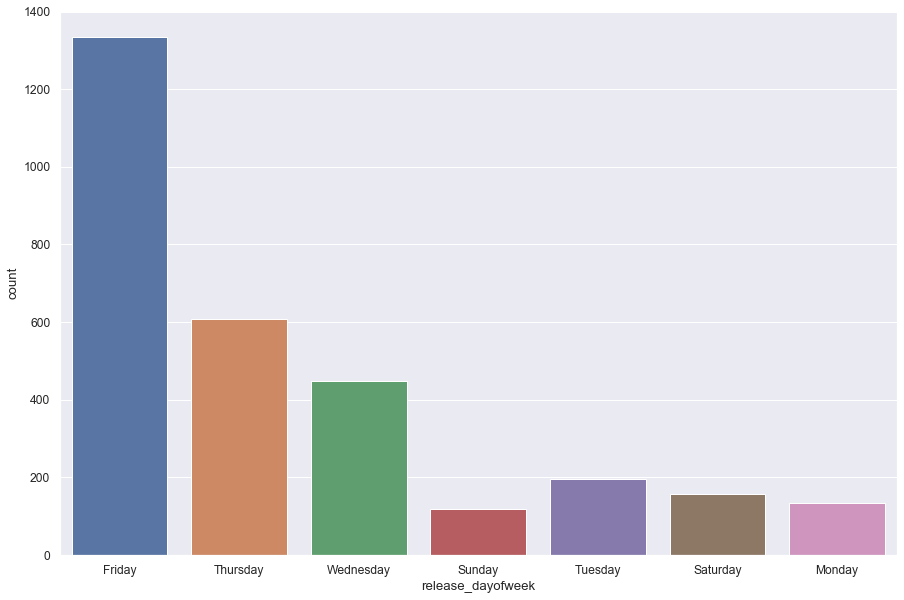

In [12]:
plt.figure(figsize=(15,10))
sns.countplot(x='release_dayofweek', data=train)

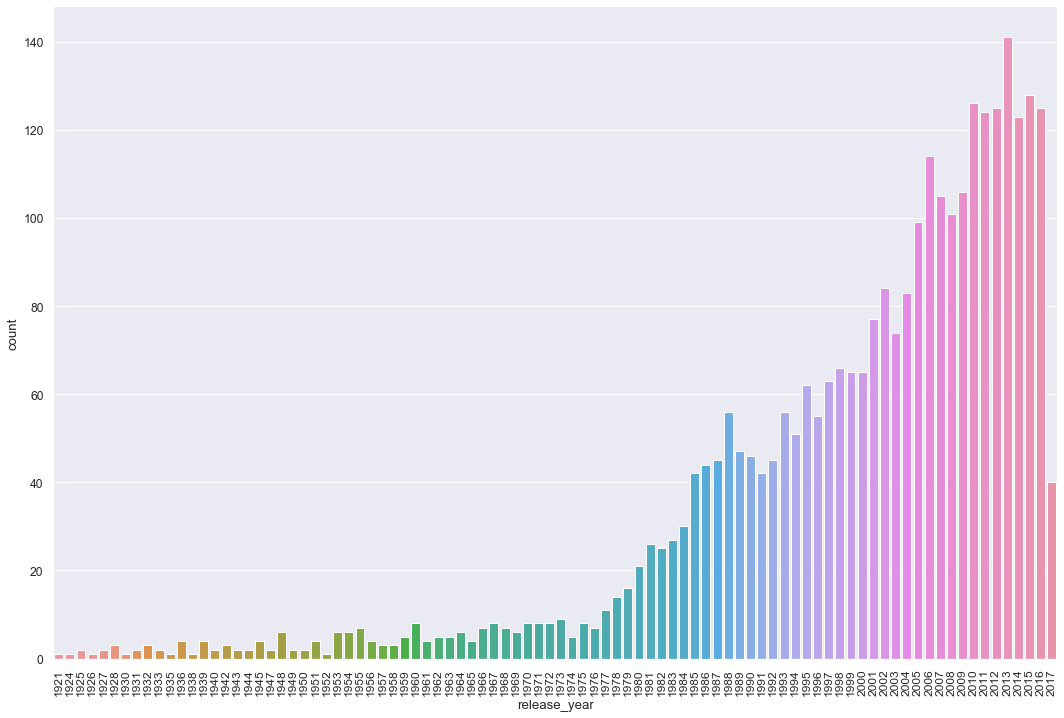

In [13]:
plt.figure(figsize=(18,12))
plt.xticks(fontsize=12,rotation=90)
sns.countplot(x='release_year', data=train)

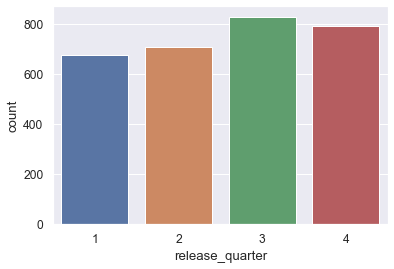

In [14]:
sns.countplot(x='release_quarter', data=train)

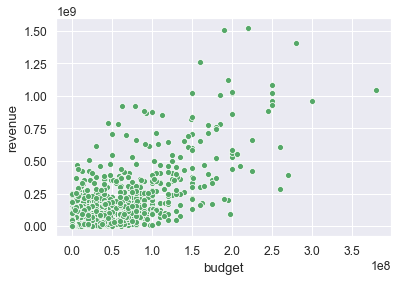

In [15]:
sns.scatterplot(x='budget', y='revenue', data=train, color = 'g')

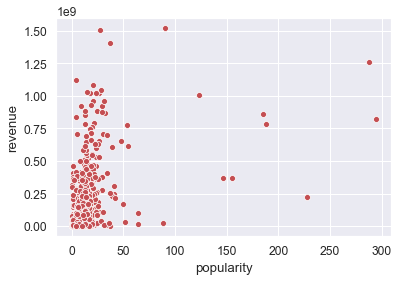

In [16]:
sns.scatterplot(x='popularity', y='revenue', data=train, color = 'r')

In [17]:
train['production_companies'].value_counts()[:11]

[{'name': 'Paramount Pictures', 'id': 4}]                          51
[{'name': 'Universal Pictures', 'id': 33}]                         36
[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]                32
[{'name': 'Warner Bros.', 'id': 6194}]                             32
[{'name': 'Twentieth Century Fox Film Corporation', 'id': 306}]    24
[{'name': 'Columbia Pictures', 'id': 5}]                           17
[{'name': 'New Line Cinema', 'id': 12}]                            17
[{'name': 'Touchstone Pictures', 'id': 9195}]                      17
[{'name': 'TriStar Pictures', 'id': 559}]                          16
[{'name': 'Orion Pictures', 'id': 41}]                             12
[{'name': 'Walt Disney Pictures', 'id': 2}]                        12
Name: production_companies, dtype: int64

In [18]:
train['production_companies_count'] = train.groupby('production_companies')['production_companies'].transform('count')

In [19]:
top_11_companies = train.loc[(train['production_companies_count'] >= 12)]

In [20]:
def horizontal_bar_chart(cnt_srs, color):
    trace = go.Bar(
        y=cnt_srs.index[::-1],
        x=cnt_srs.values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace
cnt_srs = top_10_companies.groupby('production_companies')['revenue'].agg(['mean'])
cnt_srs.columns = ["mean"]
cnt_srs = cnt_srs.sort_values(by="mean", ascending=False)
trace0 = horizontal_bar_chart(cnt_srs['mean'], 'rgba(100, 71, 96, 0.6)')
layout = go.Layout(title = '', width=1000, height=700)
fig = go.Figure(data = trace0, layout = layout)
fig

NameError: name 'top_10_companies' is not defined

In [ ]:
sns.scatterplot(x='production_companies_count', y='revenue', data=train, color = 'r')

In [ ]:
sns.scatterplot(x='runtime', y='revenue', data=train)

In [ ]:
train.loc[(train['runtime'] >= 300.0)]['title']

In [ ]:
train.loc[(train['status'] == 'Rumored')]['release_date']

In [ ]:
train.replace('Rumored', 'Released', inplace=True)

In [ ]:
train['status'].value_counts()